In [1]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

In [2]:
import pandas as pd

def load_data_from_csv(URL):
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(URL)

        # Print the first 5 rows of the DataFrame
        print(df.head(5))

        return df

    except Exception as e:
        print(f"Error: {e}")
        return None

# Usage

df = load_data_from_csv(URL)

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [34]:

import numpy as np

def replace_missing_values(df):
    # Identify the columns with missing values
    missing_cols = df.isnull().sum()
    print("Columns with missing values:")
    print(missing_cols)

    # Replace missing values with the mean of the column
    for col in missing_cols[missing_cols > 0].index:
        df[col] = df[col].fillna(df[col].mean())

    # Drop duplicate entries
    df = df.drop_duplicates()

    return df

In [35]:
# Usage
df = load_data_from_csv(URL)
df = replace_missing_values(df)

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  
Columns with missing values:
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             3
mpg             0
engineSize      0
price           0
dtype: int64


In [20]:

import matplotlib.pyplot as plt

# Load the data


# Define the target attribute
target_attr = 'price'

# One-hot encode categorical features
df1=df.drop['price']
df_encoded = pd.get_dummies(df1, drop_first=True)


# Calculate the correlation matrix
corr_matrix = df_encoded.corr()



# Get the top 5 attributes with the highest correlation
top_corr_cols = corr_matrix.unstack().sort_values(ascending=False).head(5).index

# Print the top 5 attributes
print("Top 5 attributes with the highest correlation:")
print(top_corr_cols)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix.plot(kind='bar')
plt.title('Correlation Matrix')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.show()

TypeError: 'method' object is not subscriptable

In [21]:
df = load_data_from_csv(URL)
counts = df['fuelType'].value_counts()
print(counts)


     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  
fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


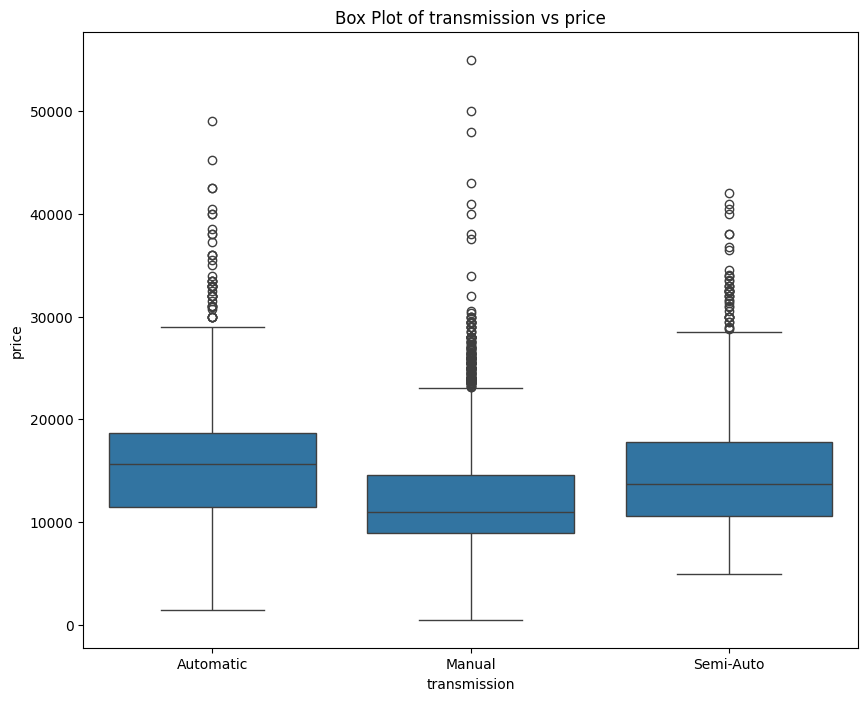

In [23]:
df = pd.read_csv(URL)
import seaborn as sns
# Define the source and target attributes
source_attr = 'transmission'
target_attr = 'price'

# Create a Seaborn box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x=source_attr, y=target_attr, data=df)
plt.title(f'Box Plot of {source_attr} vs {target_attr}')
plt.show()

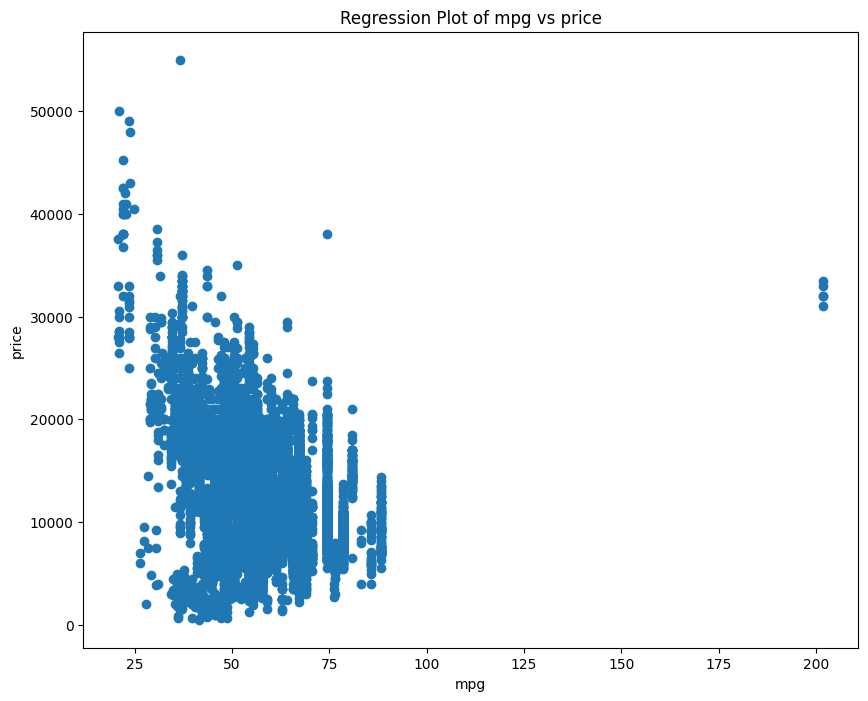

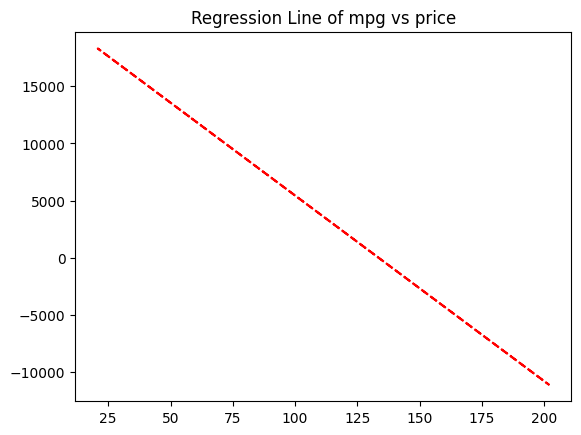

In [24]:
source_attr = 'mpg'
target_attr = 'price'

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df[source_attr], df[target_attr])
plt.title(f'Regression Plot of {source_attr} vs {target_attr}')
plt.xlabel(source_attr)
plt.ylabel(target_attr)
plt.show()

# Create a regression line
z = np.polyfit(df[source_attr], df[target_attr], 1)
p = np.poly1d(z)
plt.plot(df[source_attr], p(df[source_attr]), "r--")
plt.title(f'Regression Line of {source_attr} vs {target_attr}')
plt.show()

R^2 value: 0.13252097840163624
MSE value: 19441984.663323063


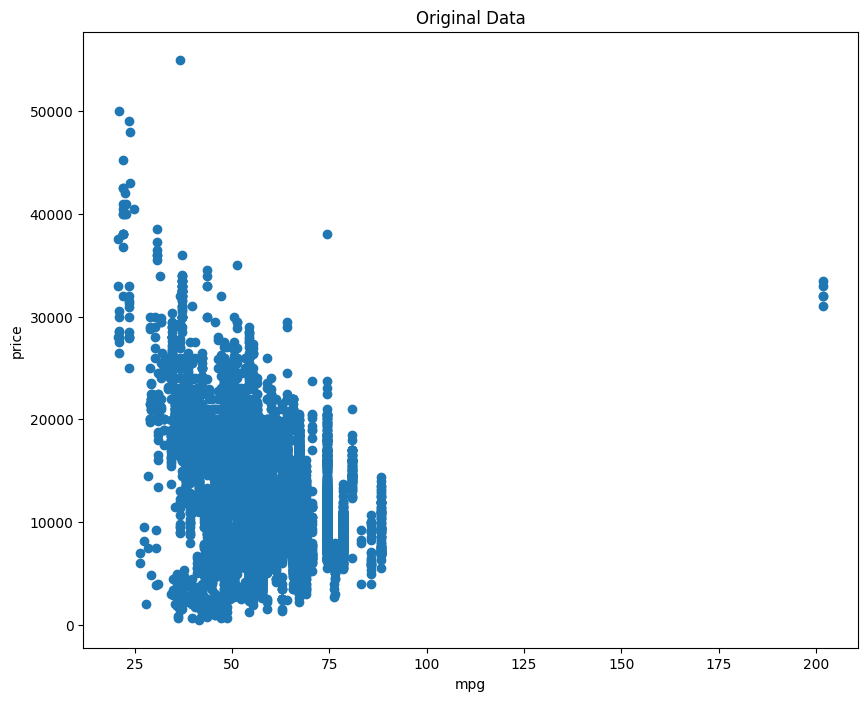

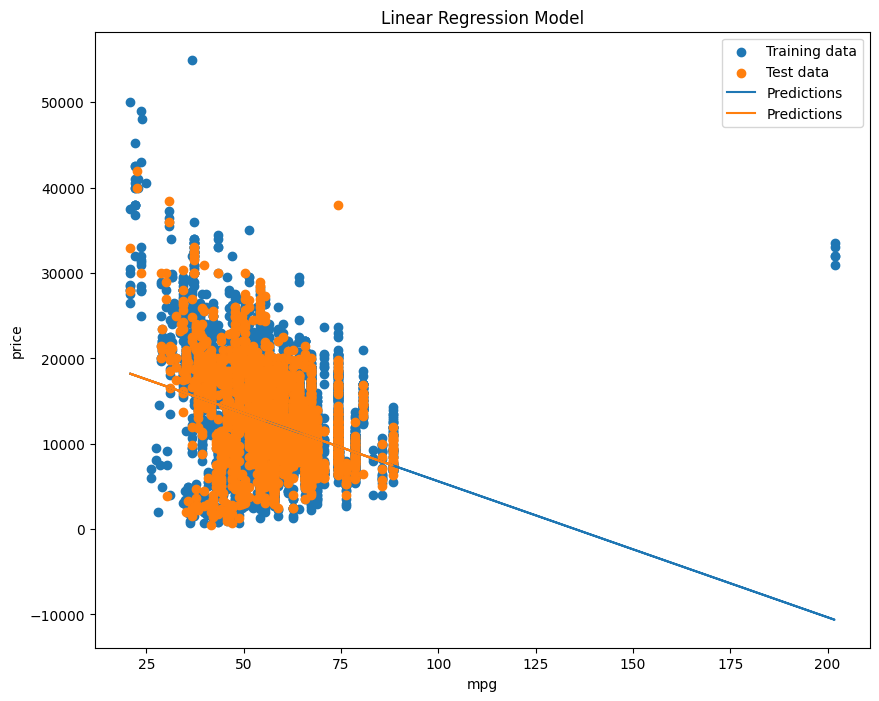

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



# Define the source and target attributes
source_attr = 'mpg'
target_attr = 'price'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[[source_attr]], df[target_attr], test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R^2 value
r2 = r2_score(y_test, y_pred)
print(f'R^2 value: {r2}')

# Calculate the Mean Squared Error (MSE) value
mse = mean_squared_error(y_test, y_pred)
print(f'MSE value: {mse}')

# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(df[source_attr], df[target_attr])
plt.title(f'Original Data')
plt.xlabel(source_attr)
plt.ylabel(target_attr)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')
plt.plot(X_train, model.predict(X_train), label='Predictions')
plt.plot(X_test, model.predict(X_test), label='Predictions')
plt.title(f'Linear Regression Model')
plt.xlabel(source_attr)
plt.ylabel(target_attr)
plt.legend()
plt.show()

In [37]:

# Define the source variables
source_vars = ['year', 'mileage', 'tax', 'mpg', 'engineSize']  # Список стовпців
target_attr = 'price'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[source_vars], df[target_attr], test_size=0.2, random_state=42)


# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R^2 value
r2 = r2_score(y_test, y_pred)
print(f'R^2 value: {r2}')

# Calculate the Mean Squared Error (MSE) value
mse = mean_squared_error(y_test, y_pred)
print(f'MSE value: {mse}')



R^2 value: 0.6917125923771601
MSE value: 6912744.910746604


ValueError: x and y must be the same size

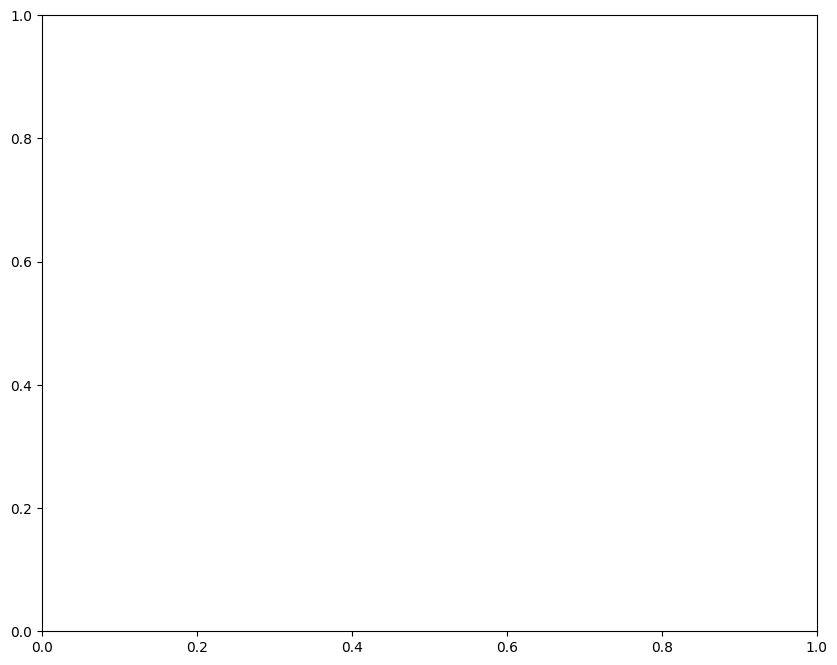

In [38]:
# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(df[source_vars], df[target_attr])
plt.title(f'Original Data')
plt.xlabel(source_vars[0])
plt.ylabel(target_attr)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')
plt.plot(X_train, model.predict(X_train), label='Predictions')
plt.plot(X_test, model.predict(X_test), label='Predictions')
plt.title(f'Linear Regression Model')
plt.xlabel(source_vars[0])
plt.ylabel(target_attr)
plt.legend()
plt.show()

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[source_vars], df[target_attr], test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate the R^2 value
r2 = r2_score(y_test, y_pred)
print(f'R^2 value: {r2}')

# Calculate the MSE value
mse = mean_squared_error(y_test, y_pred)
print(f'MSE value: {mse}')

R^2 value: 0.6917125923771685
MSE value: 6912744.910746416


In [41]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(df[source_vars], df[target_attr], test_size=0.2, random_state=42)

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.1)

# Fit the model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Calculate the MSE value
mse = mean_squared_error(y_test, y_pred)
print(f'MSE value: {mse}')

# Calculate the R^2 value
r2 = r2_score(y_test, y_pred)
print(f'R^2 value: {r2}')


MSE value: 6912725.801054709
R^2 value: 0.6917134446113233


In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.1)

# Fit the model
ridge_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test_poly)

# Calculate the MSE value
mse = mean_squared_error(y_test, y_pred)
print(f'MSE value: {mse}')

# Calculate the R^2 value
r2 = r2_score(y_test, y_pred)
print(f'R^2 value: {r2}')


MSE value: 7326174.879859914
R^2 value: 0.6732748726208025


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [47]:
from sklearn.model_selection import GridSearchCV
# Apply second degree polynomial scaling to the data
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a Ridge regression model with cross validation
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_model = Ridge()
grid_model.fit(X_train_poly, y_train)

# Create a GridSearchCV object
grid_search = GridSearchCV(grid_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

# Get the best parameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test_poly)

# Calculate the MSE value
mse = mean_squared_error(y_test, y_pred)
print(f'MSE value: {mse}')

# Calculate the R^2 value
r2 = r2_score(y_test, y_pred)
print(f'R^2 value: {r2}')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.70036e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.76253e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.75058e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

MSE value: 13840985.937515121
R^2 value: 0.3827341050893971


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.61037e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.52253e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.65221e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.71186e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin